### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent?

Il programma implementato per risolvere l'esercizio è composto da tre file. Nel *main.cpp* viene campionata la distribuzione di probabilità degli orbitali 1s e 2p dell'atomo di idrogeno, per ciascuna di esse vengono generate $M=10^6$ posizioni nello spazio utilizzando l'algoritmo di Metropolis, con probabilità di transizione uniforme. Viene calcolata la distanza media dall'origine per blocchi di $N=10^4$ posizioni e a loro volta le medie sono rielaborate con il metodo del data blocking andando a comporre i primi due grafici riportati di seguito.

Osserviamo che i dati riportati mostrano l'andamento del valor medio della distanza dall'origine delle posizioni generate in frazioni del raggio di Bhor $a_0$ al variare del numero di blocchi utilizzati per calcolare la media.

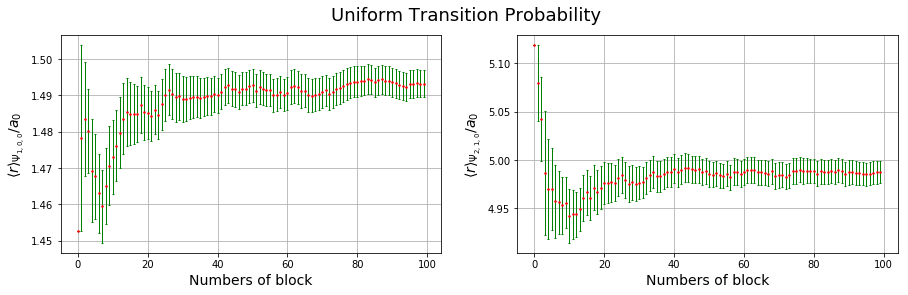

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 4))
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('figure', titlesize=18 )  # fontsize of the figure title
plt.suptitle("Uniform Transition Probability")

plt.subplot(1,2,1)
x1, f1, error1 = np.loadtxt("./code/Risultati0.dat", usecols=(0,1,2), delimiter='	', unpack='true')
plt.errorbar(x1,f1,yerr=error1, fmt='r.', errorevery=1, elinewidth=1, ecolor='green', capsize=1, ms=3)
plt.xlabel('Numbers of block')
plt.ylabel(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}/a_0$')
plt.grid(True)

plt.subplot(1,2,2)
x1, f1, error1 = np.loadtxt("./code/Risultati1.dat", usecols=(0,1,2), delimiter='	', unpack='true')
plt.errorbar(x1,f1,yerr=error1, fmt='r.', errorevery=1, elinewidth=1, ecolor='green', capsize=1, ms=3)
plt.xlabel('Numbers of block')
plt.ylabel(r'${\left\langle r \right\rangle_{\Psi_{2,1,0}}}/{a_0}$')
plt.grid(True)

plt.show()

Nel *main.cpp* prima di cominciare a campionare le distribuzioni di probabilità si procede ad equilibrare l'algoritmo in modo che l'accetazione delle posizione nuove proposte sia del 50%. Per svolgere questo compito si utilizza il metodo *Equilibratio()* della classe *Metropolis* implementato nel file *metropolis.cpp*. Esso modifica l'ampiezza dell'intervallo *delta* entro cui viene proposta la nuova posizione.

Il numero di passaggi richiesti per equilibrare l'algoritmo dipende da due fattori:
   - la posizione di partenza; tanto più ci troviamo lontani dalle posizioni con probabilità più altra (tendenzialmente quelle vicine all'origine) tanti più passi inizali deve fare l'algoritmo per avvicinarsi alla zona con probabilità massima. Osserviamo che se la posizione iniziale è troppo distante dall'origine $(1000,1000,1000)$ non viene raggiunta l'accettazione desiderata perché il programma dopo $10^4$ tentativi di aggiustare la delta restituisce un errore.
   - la delta iniziale; più il valore della delta inziale è vicino a quello ottimale, intorno ad 1 per l'orbitale 1s e intorno a 3 per il 2p, meno tempo è richiesto dall'algoritmo per convergere. Se l'accettazione iniziale è molto lontana da quella ottimale l'algoritmo potrebbe non convergere perchè ad ogni interazione le correzioni diventano sempre più piccole, quindi per delta iniziali troppo grandi i primi passi non bastano a portare l'algoritmo a delta già vicine a quella ottimali.
   
Le condizioni ideali con cui implementare inizialmente l'algoritmo sono: $delta=1$ e $Start Pos=(1,1,1)$


Per rispondere invece alla domanda su quanto dovrebbero essere grandi i blocchi utilizzati per fare *data blocking* bisognerebbe implementare un programma che misuri la funzione di autocorrelazione tra posizioni succesive. Per semplificare lo svolgimento dell'esercizio si è preferito utilizzare un numero di misure per ogni blocco molto alto ($10^4$) in modo da essere ragionevolmente certi che i dati tra due blocchi siano scorrelati. E' anche vero che l'algoritmo di Metropolis produce mosse fortemente correlate quindi per essere certi che la larghezza scelta sia sufficiente un calcolo della funzione di autocorrelazione sarebbe utile; per motivi di tempo non è stato possibile approfondire così tanto lo sviluppo del programma.

Osserviamo infine che se si utilizza come distribuzione di probabilità per generare una poszione una gaussiana centrata nella vecchia posizione con ampiezza delta i risultati non sono differenti da quelli ottenuti con una probabilità di trnsizione uniforme. Riportiamo l'immagine dei grafici ottenuti usando la distribuzione normale per generare nuove posizioni.

<img src="graph/Grafici_Gaussiani.png">

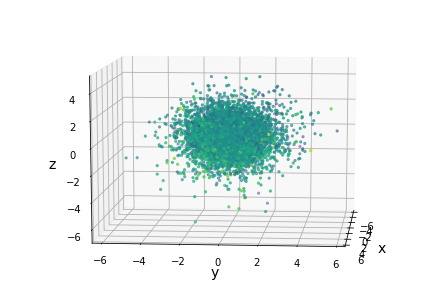

In [3]:
from mpl_toolkits.mplot3d import Axes3D
plt.rc('axes', titlesize=5)

x, y, z = np.loadtxt("./code/Posizioni.dat", usecols=(0,1,2), delimiter='	', unpack='true',max_rows=10000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=x, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10,                                                                                                                                                                                                  5)
plt.show()

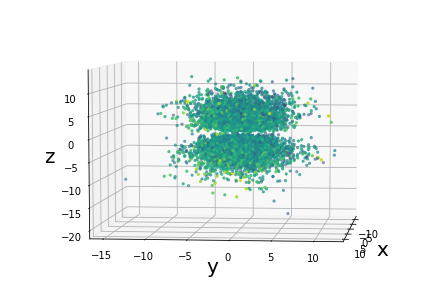

In [4]:
x, y, z = np.loadtxt("./code/Posizioni.dat", usecols=(0,1,2), delimiter='	', unpack='true',skiprows=10000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=x, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(6, 6)
plt.show()